# Types of Joins

## Joins

Sometimes data is spread across multiple datasets.

For example, suppose we have baby names in 1920 and 2020:

In [2]:
import pandas as pd

data_dir = "http://dlsun.github.io/pods/data/names/"
df_1920 = pd.read_csv(data_dir + "yob1920.txt", header=None, 
                        names=["Name", "Sex", "Count"])
df_2020 = pd.read_csv(data_dir + "yob2020.txt", header=None, 
                        names=["Name", "Sex", "Count"])

In [3]:
df_1920.head()

,Name,Sex,Count
0,Mary,F,70975
1,Dorothy,F,36645
2,Helen,F,35098
3,Margaret,F,27997
4,Ruth,F,26100


In [4]:
df_2020.head()

,Name,Sex,Count
0,Olivia,F,17641
1,Emma,F,15656
2,Ava,F,13160
3,Charlotte,F,13065
4,Sophia,F,13036


We can *join* two datasets on a key.

We focused on the case where we join on a **primary key.**

In this case, we are joining the primary keys of two tables together. (We could also join the primary key to a **foreign key.**)

In [5]:
df_joined = df_1920.merge(df_2020, on=["Name", "Sex"], suffixes=("_1920", "_2020"))
df_joined

,Name,Sex,Count_1920,Count_2020
0,Mary,F,70975,2210
1,Dorothy,F,36645,562
2,Helen,F,35098,721
3,Margaret,F,27997,2190
4,Ruth,F,26100,1323
...,...,...,...,...
4473,Whitt,M,5,23
4474,Wyley,M,5,6
4475,Xavier,M,5,3876
4476,York,M,5,14


## Missing Keys?

In [6]:
df_joined[df_joined["Name"] == "Maya"]

,Name,Sex,Count_1920,Count_2020


Why isn't Maya in the joined data? How does Pandas determine which keys show up?

It is there in the 2020 data...

In [7]:
df_2020[df_2020["Name"] == "Maya"]

,Name,Sex,Count
60,Maya,F,3724
28914,Maya,M,6


...but not in the 1920 data.

In [8]:
df_1920[df_1920["Name"] == "Maya"]

,Name,Sex,Count


In order to appear in the joined data, a key must be present in *both* tables.

## Types of Joins

How can we customize the behavior of joins for missing keys?

This brings us to the first of today's topics: *types of joins.*

- By default, Pandas does an **inner join,** which only keeps keys that are present in *both* tables.
- An **outer join** keeps any key that is present in either table.
- A **left join** keeps all keys in the left table, even if they are not in the right table. But any keys that are only in the right table are dropped.
- A **right join** keeps all keys in the right table, even if they are not in the left table. But any keys that are only in the left table are dropped.

## Join Examples

We can customize the type of join using the `how=` parameter of `.merge().` By default, `how="inner".`

In [9]:
df_joined_outer = df_1920.merge(df_2020, on=["Name", "Sex"], how="outer")
df_joined_outer[df_joined_outer["Name"] == "Maya"]

,Name,Sex,Count_x,Count_y
24999,Maya,F,NaN,3724.0
25000,Maya,M,NaN,6.0


Note the missing values for other columns, like Count, for 1920!

What other type of join would have produced this output?

In [10]:
df_joined_right = df_1920.merge(df_2020, on=["Name", "Sex"], how="right")
df_joined_right[df_joined_right["Name"] == "Maya"]

,Name,Sex,Count_x,Count_y
60,Maya,F,NaN,3724
28914,Maya,M,NaN,6


## Summary of Types of Joins

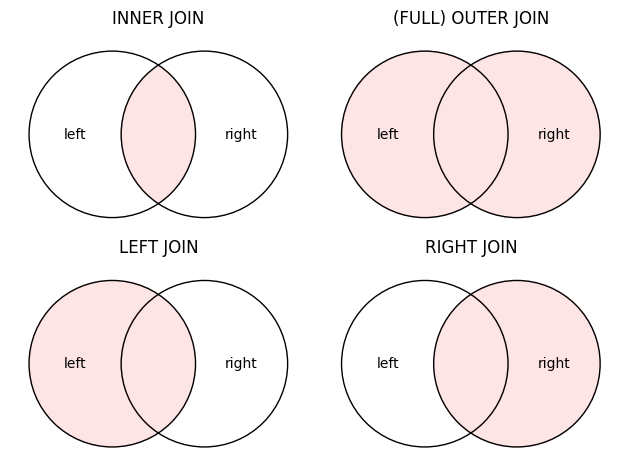

In [11]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2)

# function to create a Venn diagram with specified subsets and colors
def create_venn_diagram(ax, subsets, title, colors):
    venn = venn2(subsets=subsets, set_labels=('', ''), ax=ax)
    venn.get_label_by_id('10').set_text('left')
    venn.get_patch_by_id('10').set_color(colors[0])
    venn.get_label_by_id('01').set_text('right')
    venn.get_patch_by_id('01').set_color(colors[1])
    venn.get_label_by_id('11').set_text('')
    venn.get_patch_by_id('11').set_color(colors[2])
    venn2_circles(subsets=subsets, linewidth=1, ax=ax)
    ax.set_title(title)

# define the join types and their corresponding subset sizes and colors
join_types = [
    {"title": "INNER JOIN", "subsets": (2, 2, 1), "colors": ['white', 'white', '#febfbf']},
    {"title": "(FULL) OUTER JOIN", "subsets": (2, 2, 1), "colors": ['#febfbf', '#febfbf', '#febfbf']},
    {"title": "LEFT JOIN", "subsets": (2, 2, 1), "colors": ['#febfbf', 'white', '#febfbf']},
    {"title": "RIGHT JOIN", "subsets": (2, 2, 1), "colors": ['white', '#febfbf', '#febfbf']}
]

# zip through the axes and join types to create each Venn diagram
for ax, join_type in zip(axis.flatten(), join_types):
    create_venn_diagram(ax, join_type["subsets"], join_type["title"], join_type["colors"])

plt.tight_layout()
plt.show()

## Exercises

Which type of join would be best suited for each case?

1. We want to determine the names that have increased in popularity the most between 1920 and 2020.

In [12]:
# to include names that didn't appear at all in the 1920 data
df_1920.merge(df_2020, on=["Name", "Sex"], how="right")

,Name,Sex,Count_x,Count_y
0,Olivia,F,523.0,17641
1,Emma,F,5237.0,15656
2,Ava,F,184.0,13160
3,Charlotte,F,3623.0,13065
4,Sophia,F,545.0,13036
...,...,...,...,...
31448,Zykell,M,NaN,5
31449,Zylus,M,NaN,5
31450,Zymari,M,NaN,5
31451,Zyn,M,NaN,5


2. We want to graph the popularity of names over time.

In [13]:
df = pd.read_csv(data_dir + "yob1981.txt",
                 header=None,
                 names=["Name","Sex", 1981])
for year in range(1982, 2021):
    df_year =pd.read_csv(data_dir + f"yob{year}.txt",
                         header=None,
                         names=["Name","Sex", year])
    # to include rare names that go in and out of the data
    df = df.merge(df_year, on=["Name", "Sex"], how="outer")

## Many-to-Many Relationships

So far, the keys we’ve joined on have been the primary key of (at least) one table.

- If we join to the primary key of another table, then the relationship is **one-to-one** (since primary keys uniquely identify rows).
- If we join to the foreign key of another table, then the relationship is **one-to-many.**

What if we join on a key that is not a primary key?

That is, what if the key does not uniquely identify rows in either table so that each value of the key might appear multiple times?

This relaionship is called **many-to-many.**

## Many-to-Many Example

What if we only joined on the name?

In [16]:
df_1920.merge(df_2020, on="Name")

,Name,Sex_x,Count_x,Sex_y,Count_y
0,Mary,F,70975,F,2210
1,Mary,F,70975,M,5
2,Dorothy,F,36645,F,562
3,Helen,F,35098,F,721
4,Margaret,F,27997,F,2190
...,...,...,...,...,...
6158,Xavier,M,5,M,3876
6159,York,M,5,F,6
6160,York,M,5,M,14
6161,Zeke,M,5,M,382


## Illustration of a Many-to-Many Join

![Illustration of a Many-to-Many Join](data/many-to-many-join.png)

There are 4 matches, only 2 of which are desirable.

## Preventing Bugs

Most of the time, many-to-many joins are a bug, caused by a misunderstanding about the primary key.


Pandas allows us to specify the relationship we are expecting. It will fail with an error if the relationship is a different kind.

For example, suppose we thought that “name” was the primary key of the baby name tables.

In [17]:
df_1920.merge(df_2020, on="Name", validate="one_to_one")

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

Errors are (sometimes) your friend. They can prevent you from making even bigger mistakes!

## What We've Learned Today

We've discussed two kinds of complications with joins:

- when akey doesn’t appear in one table (outer, left, right join)
- when akey appears multiple times in both tables (many-to-many joins)